In [5]:
%pip install pydub
%pip install librosa
%pip install os-sys  
%pip install librosa
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install keras
%pip install pydub
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/

ERROR: os-sys has an invalid wheel, os-sys has an invalid wheel, could not read 'os_sys-1.9.3.dist-info/WHEEL' file: KeyError("There is no item named 'os_sys-1.9.3.dist-info/WHEEL' in the archive")


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 3.5 MB/s eta 0:01:52
   ---------------------------------------- 0.5/390.3 MB 4.8 MB/s eta 0:01:22
   ---------------------------------------- 0.6/390.3 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 0.8/390.3 MB 4.3 MB/s eta 0:01:31
   ---------------------------------------- 1.1/390.3 MB 4.7 MB/s eta 0:01:22
   ---------------------------------------- 1.4/390.3 MB 4.9 MB/s eta 0:01:20
   ---------------------------------------- 1.8/390.3 MB 5.5 MB/s eta 0:01:11
   ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import models
from keras import layers
import pydub
from pydub import AudioSegment
from pydub.utils import which
AudioSegment.converter = which("ffmpeg")
AudioSegment.ffprobe = which("ffprobe")
import math
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import save_model

In [2]:
src_dir = 'dataset'
print(os.listdir(src_dir))

['Ardhito Pramono_Dancing In September.mp3', 'Ed Sheeran_Supermarket Flowers.mp3', 'GANGGA_Whiskey Bottle.mp3', 'Giveon_Heartbreak Anniversary.mp3', 'Gracie Abrams_That’s So True.mp3', 'Keshi_UNDERSTAND.mp3', 'Labrinth_Jealous.mp3', 'Lady Gaga_Die With A Smile.mp3', 'Lauv_First Heartbreak.mp3', 'Lukas Graham_Love Someone.mp3', 'Rich Brian_100 Degrees.mp3', 'Ricky Montgomery_This December.mp3']


In [3]:
src_dir = 'dataset'
dst_dir = 'dataset_wav'

SAMPLE_RATE = 22050
N_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512
NUM_SEGMENTS = 10
file_list = []

def convert_mp3_to_wav(src_dir, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    labels = set()

    for file_name in os.listdir(src_dir):
        if file_name.endswith('.mp3'):
            sub_dir = os.path.join(dst_dir, file_name.replace('.mp3', ''))
            if not os.path.exists(sub_dir):
                os.makedirs(sub_dir)

            mp3_path = os.path.join(src_dir, file_name)
            wav_path = os.path.join(sub_dir, file_name.replace('.mp3', '.wav'))

            try:
                audio = AudioSegment.from_mp3(mp3_path)
                audio.export(wav_path, format='wav')
                print(f"Converted {mp3_path} to {wav_path}")
                file_list.append(wav_path)
                
                if "_" in file_name:
                    artist, song = file_name.replace('.mp3', '').split("_", 1)
                    label = f"{artist} - {song}"
                    labels.add(label)  
            except Exception as e:
                print(f"Failed to convert {mp3_path}: {e}")

    with open('labels.txt', 'w') as f:
        for label in labels: 
            f.write(label + "\n")
    # print(f"Labels saved to labels.txt")

def crop_wav(wav_dir, segment_duration=5000, num_segments_per_file=NUM_SEGMENTS):
    for root, _, files in os.walk(wav_dir):
        for file_name in files:
            if file_name.endswith('.wav'):
                wav_path = os.path.join(root, file_name)
                try:
                    audio = AudioSegment.from_wav(wav_path)
                    audio_length = len(audio)

                    for i in range(num_segments_per_file):
                        start = random.randint(0, audio_length - segment_duration)
                        end = start + segment_duration
                        segment = audio[start:end]

                        segment_file_name = f"{file_name.replace('.wav', '')}_segment_{i}.wav"
                        segment_path = os.path.join(root, segment_file_name)
                        segment.export(segment_path, format='wav')
                        print(f"Cropped {wav_path} into {segment_path}")
                except Exception as e:
                    print(f"Failed to crop {wav_path}: {e}")

convert_mp3_to_wav(src_dir, dst_dir)
crop_wav(dst_dir)

Converted dataset\Ardhito Pramono_Dancing In September.mp3 to dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav
Converted dataset\Ed Sheeran_Supermarket Flowers.mp3 to dataset_wav\Ed Sheeran_Supermarket Flowers\Ed Sheeran_Supermarket Flowers.wav
Converted dataset\GANGGA_Whiskey Bottle.mp3 to dataset_wav\GANGGA_Whiskey Bottle\GANGGA_Whiskey Bottle.wav
Converted dataset\Giveon_Heartbreak Anniversary.mp3 to dataset_wav\Giveon_Heartbreak Anniversary\Giveon_Heartbreak Anniversary.wav
Converted dataset\Gracie Abrams_That’s So True.mp3 to dataset_wav\Gracie Abrams_That’s So True\Gracie Abrams_That’s So True.wav
Converted dataset\Keshi_UNDERSTAND.mp3 to dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND.wav
Converted dataset\Labrinth_Jealous.mp3 to dataset_wav\Labrinth_Jealous\Labrinth_Jealous.wav
Converted dataset\Lady Gaga_Die With A Smile.mp3 to dataset_wav\Lady Gaga_Die With A Smile\Lady Gaga_Die With A Smile.wav
Converted dataset\Lauv_First Heartbreak.mp

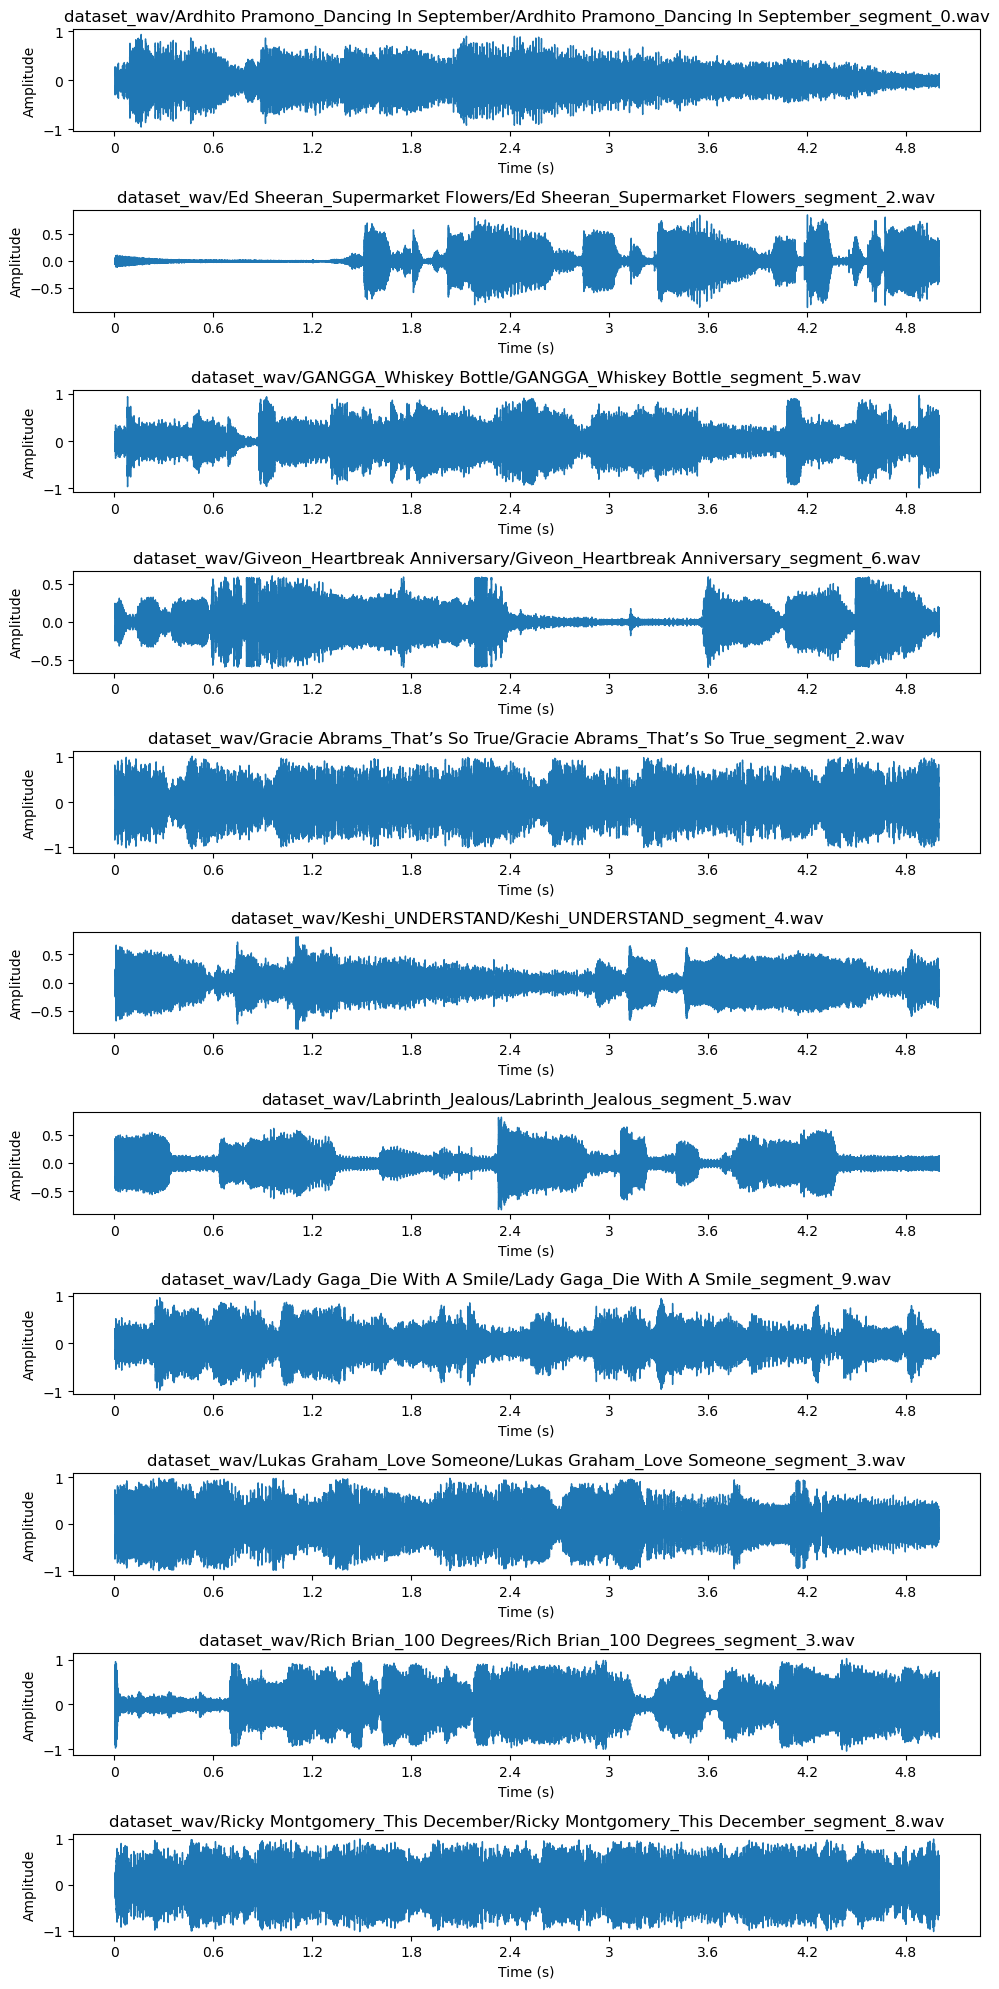

In [5]:
SAMPLE_RATE = 22050
files = [
    "dataset_wav/Ardhito Pramono_Dancing In September/Ardhito Pramono_Dancing In September_segment_0.wav",
    "dataset_wav/Ed Sheeran_Supermarket Flowers/Ed Sheeran_Supermarket Flowers_segment_2.wav",
    "dataset_wav/GANGGA_Whiskey Bottle/GANGGA_Whiskey Bottle_segment_5.wav",
    "dataset_wav/Giveon_Heartbreak Anniversary/Giveon_Heartbreak Anniversary_segment_6.wav",
    "dataset_wav/Gracie Abrams_That’s So True/Gracie Abrams_That’s So True_segment_2.wav",
    "dataset_wav/Keshi_UNDERSTAND/Keshi_UNDERSTAND_segment_4.wav",
    "dataset_wav/Labrinth_Jealous/Labrinth_Jealous_segment_5.wav",
    "dataset_wav/Lady Gaga_Die With A Smile/Lady Gaga_Die With A Smile_segment_9.wav",
    "dataset_wav/Lukas Graham_Love Someone/Lukas Graham_Love Someone_segment_3.wav",
    "dataset_wav/Rich Brian_100 Degrees/Rich Brian_100 Degrees_segment_3.wav",
    "dataset_wav/Ricky Montgomery_This December/Ricky Montgomery_This December_segment_8.wav"
]

fig, axes = plt.subplots(nrows=len(files), figsize=(10, 20))

for i, file_path in enumerate(files):
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    axes[i].set_title(file_path)
    librosa.display.waveshow(signal, sr=sr, ax=axes[i])
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()


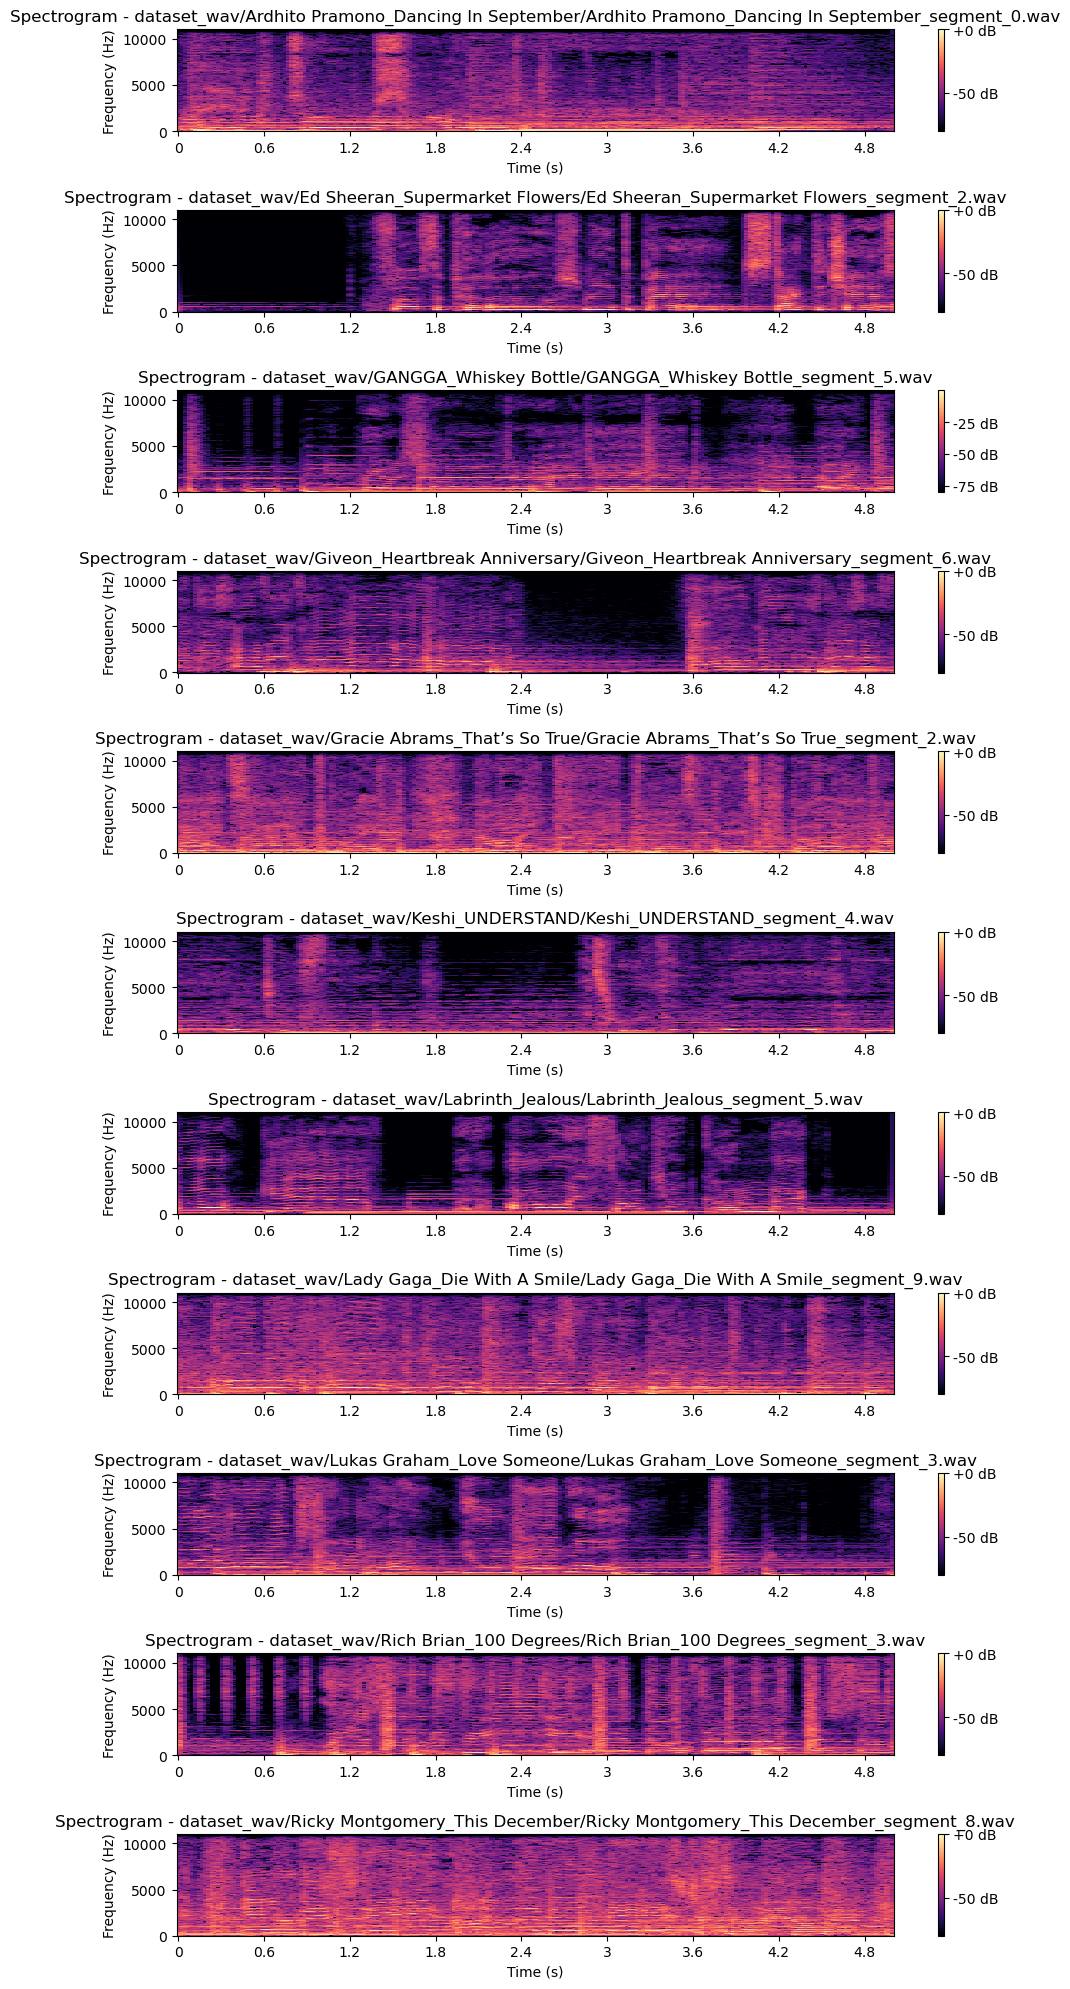

In [6]:
fig, axes = plt.subplots(nrows=len(files), figsize=(10, 20))

for i, file_path in enumerate(files):
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    D = np.abs(librosa.stft(signal))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    img = librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='linear', ax=axes[i])
    axes[i].set_title(f"Spectrogram - {file_path}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Frequency (Hz)")
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [4]:
import random
def augment_audio(signal, sr):

    rate = random.uniform(0.8, 1.2)
    stretched_signal = librosa.effects.time_stretch(signal, rate=rate)

    steps = random.randint(-5, 5)
    shifted_signal = librosa.effects.pitch_shift(signal, sr=sr,n_steps=steps)

    noise_factor = 0.005
    noise = np.random.randn(len(signal))
    noisy_signal = signal + noise_factor * noise

    return [stretched_signal, shifted_signal, noisy_signal]

In [5]:
DATASET_PATH = "dataset_wav"

num_samples_per_segment = int(SAMPLE_RATE * 5 / NUM_SEGMENTS)
expected = math.ceil(num_samples_per_segment / HOP_LENGTH)

def mfcc(data_set):
    features = []
    labels = []

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_set)):
        if dirpath != data_set:
            label = dirpath.split("/")[-1]
            print("\nProcessing {}".format(label))

            for filename in filenames:
                file_path = os.path.join(dirpath, filename)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                for s in range(NUM_SEGMENTS):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment

                    mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample], sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                    mfcc = mfcc.T

                    if len(mfcc) == expected:
                        features.append(mfcc.tolist())
                        labels.append(label)
                        print("{}, segment:{}".format(file_path, s + 1))

                augmented_signals = augment_audio(signal, sr=SAMPLE_RATE)
                for augmented_signal in augmented_signals:
                    for s in range(NUM_SEGMENTS):
                        start_sample = num_samples_per_segment * s
                        finish_sample = start_sample + num_samples_per_segment

                        mfcc = librosa.feature.mfcc(y=augmented_signal[start_sample:finish_sample], sr=sr, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                        mfcc = mfcc.T

                        if len(mfcc) == expected:
                            features.append(mfcc.tolist())
                            labels.append(label)
                            print("Augmented, {}, segment:{}".format(file_path, s + 1))

    return np.array(features), np.array(labels)

mfccs, labels = mfcc(DATASET_PATH)



Processing dataset_wav\Ardhito Pramono_Dancing In September
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:1
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:2
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:3
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:4
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:5
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:6
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:7
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:8
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September.wav, segment:9
dataset_wav\Ardhito Pramono_Da

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Augmented, dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_1.wav, segment:7
Augmented, dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_1.wav, segment:8
Augmented, dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_1.wav, segment:9
Augmented, dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_1.wav, segment:10
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_2.wav, segment:1
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_2.wav, segment:2
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_2.wav, segment:3
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Dancing In September_segment_2.wav, segment:4
dataset_wav\Ardhito Pramono_Dancing In September\Ardhito Pramono_Da

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=600
  warnings.warn(


Augmented, dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_6.wav, segment:9
Augmented, dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_6.wav, segment:10
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:1
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:2
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:3
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:4
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:5
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:6
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:7
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:8
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:9
dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:10
Augmented, dataset_wav\Keshi_UNDERSTAND\Keshi_UNDERSTAND_segment_7.wav, segment:1
Augmented, dataset_wav\Keshi_UNDERSTAND\Ke

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1745
  warnings.warn(


Augmented, dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_0.wav, segment:7
Augmented, dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_0.wav, segment:8
Augmented, dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_0.wav, segment:9
Augmented, dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_0.wav, segment:10
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:1
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:2
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:3
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:4
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:5
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:6
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:7
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:8
dataset_wav\Labrinth_Jealous\Labrinth_Jealous_segment_1.wav, segment:9
dataset_wav\Labrinth_Jealous\Lab

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1391
  warnings.warn(


Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_0.wav, segment:7
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_0.wav, segment:8
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_0.wav, segment:9
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_0.wav, segment:10
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:1
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:2
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:3
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:4
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:5
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_1.wav, segment:6
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_s

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1399
  warnings.warn(


Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_5.wav, segment:6
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_5.wav, segment:7
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_5.wav, segment:8
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_5.wav, segment:9
Augmented, dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_5.wav, segment:10
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_6.wav, segment:1
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_6.wav, segment:2
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_6.wav, segment:3
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_6.wav, segment:4
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Love Someone_segment_6.wav, segment:5
dataset_wav\Lukas Graham_Love Someone\Lukas Graham_Lov

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=833
  warnings.warn(


Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:1
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:2
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:3
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:4
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:5
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:6
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:7
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:8
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:9
Augmented, dataset_wav\Rich Brian_100 Degrees\Rich Brian_100 Degrees_segment_9.wav, segment:10

Processing dataset_wav\Ricky Montgomery_This December
data

c:\Users\Aryo Baskoro\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=253
  warnings.warn(


Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:4
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:5
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:6
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:7
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:8
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:9
Augmented, dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_5.wav, segment:10
dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_6.wav, segment:1
dataset_wav\Ricky Montgomery_This December\Ricky Montgomery_This December_segment_6.wav, segment:2
dataset_wav\Ricky Montgomery_Th

In [6]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

mfccs = mfccs[...,np.newaxis]

x_train,x_temp,y_train,y_temp = train_test_split(mfccs,labels,test_size = 0.4,random_state = 42,shuffle=True)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size = 0.5,random_state = 42,shuffle=True)

In [7]:
model = models.Sequential(
    [
        layers.Input(shape=(expected, N_MFCC, 1)),
        layers.Conv2D(filters=24, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D((4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=48, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D((4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(filters=48, kernel_size=(5, 5), activation="relu", padding='same'),
        layers.MaxPooling2D((4, 4), strides=(2, 2), padding='same'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(12, activation="softmax"),  
    ]
)


In [8]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (3109, 22, 13, 1)
Shape of y_train: (3109,)
Shape of x_val: (1036, 22, 13, 1)
Shape of y_val: (1036,)
Shape of x_test: (1037, 22, 13, 1)
Shape of y_test: (1037,)


In [9]:
print(f"Unique labels in the dataset: {np.unique(labels)}")
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32, 
    callbacks=[reduce_lr, early_stopping],
    verbose=1  
)

Unique labels in the dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1432 - loss: 2.7776 - val_accuracy: 0.2529 - val_loss: 2.3416 - learning_rate: 1.0000e-04
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3101 - loss: 2.1295 - val_accuracy: 0.4131 - val_loss: 2.1254 - learning_rate: 1.0000e-04
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3984 - loss: 1.8392 - val_accuracy: 0.5241 - val_loss: 1.8054 - learning_rate: 1.0000e-04
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4646 - loss: 1.6407 - val_accuracy: 0.5898 - val_loss: 1.5377 - learning_rate: 1.0000e-04
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5238 - loss: 1.5020 - val_accuracy: 0.6236 - val_loss: 1.3497 - learning_rate: 1.0000e-04
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5706 - loss: 1.3738 - val_accuracy: 0.6496 - val_loss: 1.2352 - learning_rate: 1.0000e-04
Ep

In [10]:
score = model.evaluate(x_test,y_test)
print (f"Test Loss : {score[0]}")
print (f"Test Accuracy : {score[1]}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8514 - loss: 0.5154
Test Loss : 0.5532075762748718
Test Accuracy : 0.8293153047561646


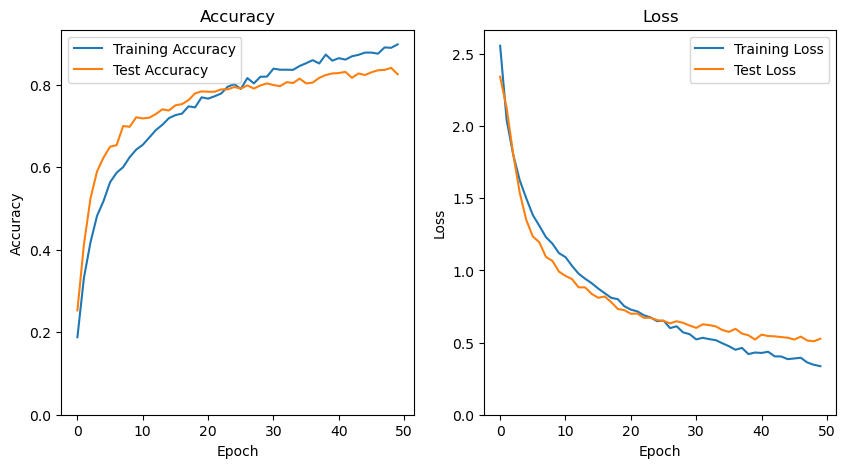

In [11]:
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Test Accuracy")
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Test Loss")
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(bottom=0)

plt.show()


In [12]:
import pickle
with open('/nice2.pkl','wb') as a:
    pickle.dump(model,a)

In [13]:
from collections import Counter
label_to_song = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

def predict_song(file_path):
    signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    num_segments = math.ceil(len(signal) / num_samples_per_segment)

    predictions = []

    for s in range(num_segments):
        start_sample = num_samples_per_segment * s
        end_sample = start_sample + num_samples_per_segment

        segment = signal[start_sample:end_sample]
        mfcc_features = librosa.feature.mfcc(
            y=segment, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH
        )
        mfcc_features = mfcc_features.T[np.newaxis, ..., np.newaxis]

        prediction = model.predict(mfcc_features)
        predicted_label = np.argmax(prediction)
        predictions.append(predicted_label)

    most_common_label = Counter(predictions).most_common(1)[0][0]
    print(f"Predicted label: {most_common_label}")

    predicted_song = label_to_song[most_common_label]
    return predicted_song

new_file_path = "dataset_wav/Gracie Abrams_That’s So True/Gracie Abrams_That’s So True_segment_7.wav"
predicted_song = predict_song(new_file_path)
path_parts = predicted_song.split("\\")[-1]  
artist, song = path_parts.split("_")  

print(f"Predicted Artist: {artist}")
print(f"Predicted Song: {song}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted label: 4
Predicted Artist: Gracie Abrams
Predicted Song: That’s So True


In [ ]:
model.save("model.keras")